<a href="https://colab.research.google.com/github/ravi18kumar2021/EDA_projects/blob/main/EDA_House_Price_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download 'house-prices-advanced-regression-techniques/data'

404 - Not Found


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1460, 81)

In [6]:
df.isnull().sum() # total number of missing values in each column

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
missing = df.isnull().sum()
missing[missing > 0] # extract columns that have missing values

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
missing_cols = missing[missing > 0]
missing_cols.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### Bar Plot

<Axes: >

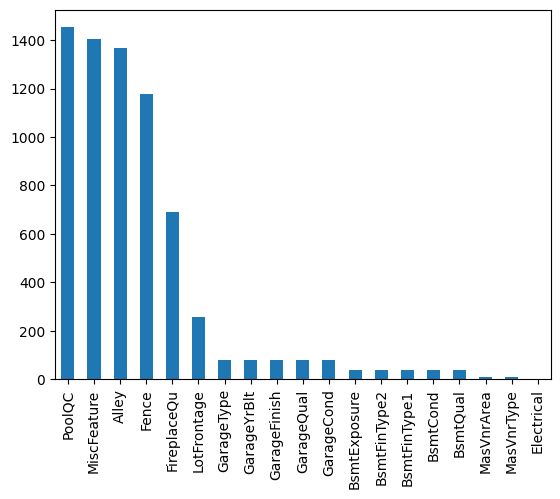

In [10]:
missing_cols.sort_values(ascending=False).plot(kind='bar')

In [12]:
sorted_cols = missing_cols.sort_values(ascending=False)

<BarContainer object of 19 artists>

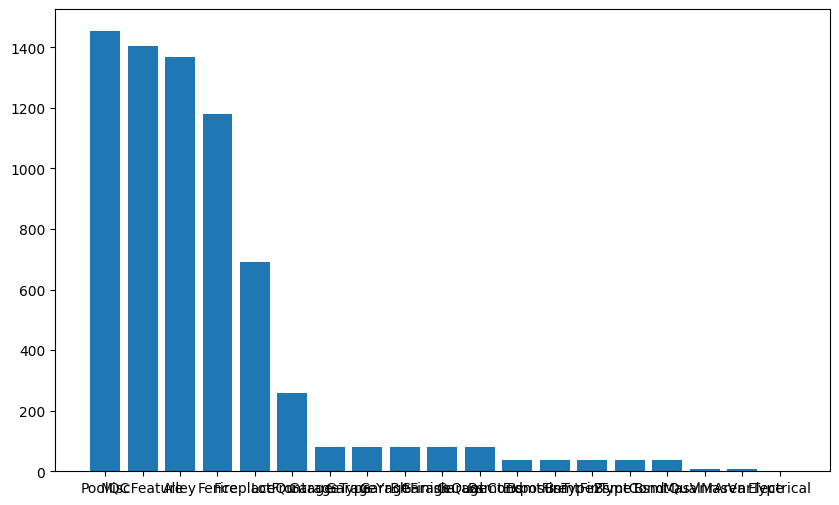

In [15]:
plt.figure(figsize=(10,6))
plt.bar(sorted_cols.index, sorted_cols.values)

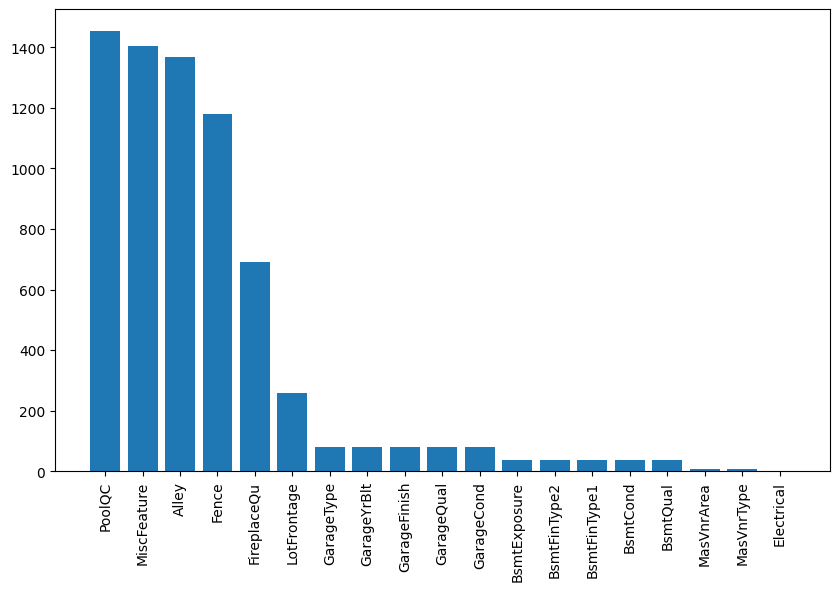

In [17]:
plt.figure(figsize=(10,6))
plt.bar(sorted_cols.index, sorted_cols.values)
plt.xticks(rotation=90)
plt.show()

<Axes: >

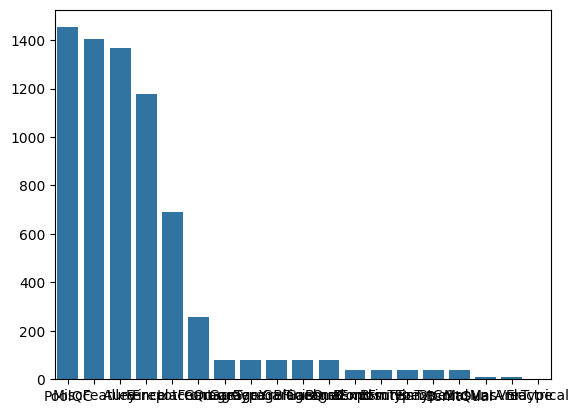

In [23]:
sns.barplot(sorted_cols)

<ipython-input-27-4043600ba235>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(labels=sorted_cols.index, rotation=90)


[Text(0, 0, 'PoolQC'),
 Text(1, 0, 'MiscFeature'),
 Text(2, 0, 'Alley'),
 Text(3, 0, 'Fence'),
 Text(4, 0, 'FireplaceQu'),
 Text(5, 0, 'LotFrontage'),
 Text(6, 0, 'GarageType'),
 Text(7, 0, 'GarageYrBlt'),
 Text(8, 0, 'GarageFinish'),
 Text(9, 0, 'GarageQual'),
 Text(10, 0, 'GarageCond'),
 Text(11, 0, 'BsmtExposure'),
 Text(12, 0, 'BsmtFinType2'),
 Text(13, 0, 'BsmtFinType1'),
 Text(14, 0, 'BsmtCond'),
 Text(15, 0, 'BsmtQual'),
 Text(16, 0, 'MasVnrArea'),
 Text(17, 0, 'MasVnrType'),
 Text(18, 0, 'Electrical')]

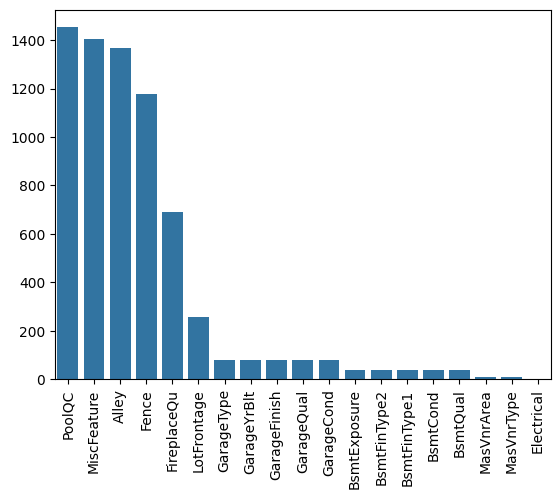

In [27]:
a = sns.barplot(sorted_cols)
a.set_xticklabels(labels=sorted_cols.index, rotation=90)

### Histogram

In [18]:
df.columns[-1] # target column

'SalePrice'

In [20]:
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

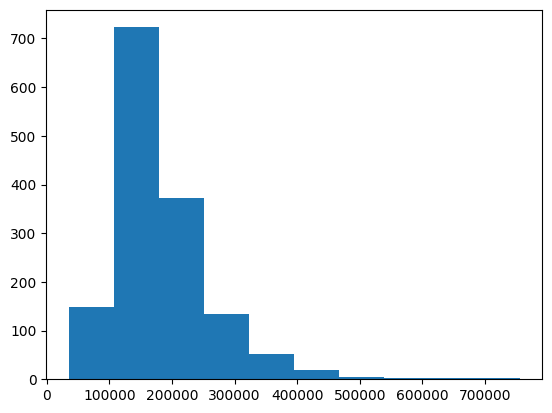

In [21]:
plt.hist(df['SalePrice'], bins=10)

<ipython-input-36-de4fd7ba2d2c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], bins=10)


<Axes: xlabel='SalePrice', ylabel='Density'>

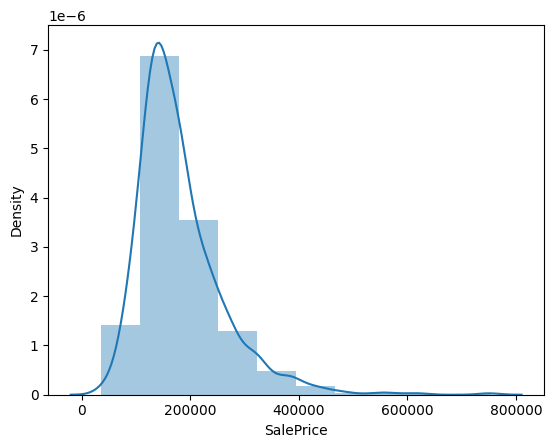

In [36]:
sns.distplot(df['SalePrice'], bins=10)

<Axes: xlabel='SalePrice', ylabel='Density'>

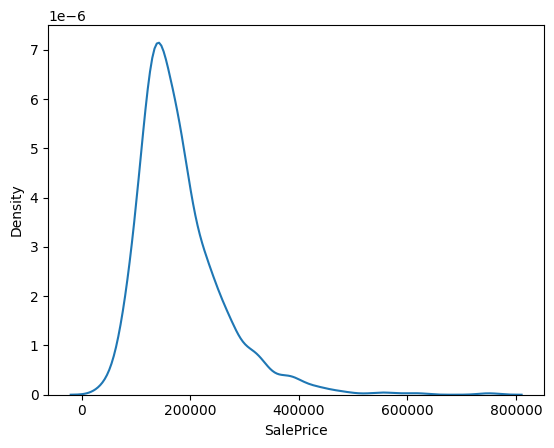

In [32]:
sns.kdeplot(df['SalePrice'])

<ipython-input-38-61adc0c6224b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], bins=10, hist=False)


<Axes: xlabel='SalePrice', ylabel='Density'>

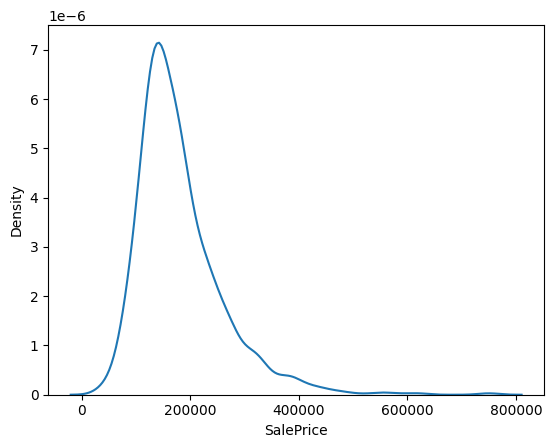

In [38]:
sns.distplot(df['SalePrice'], bins=10,)

### Correlation

In [40]:
df.select_dtypes(include=np.number).columns # extract numeric data type columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [42]:
df.select_dtypes(include='number').columns # extract numeric data type columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [45]:
df.select_dtypes(include='object').columns # extract string data type columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [48]:
df.select_dtypes(include='number').corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: >

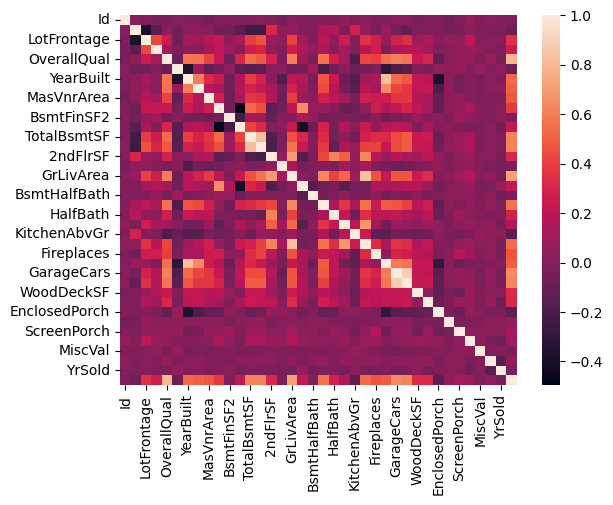

In [49]:
sns.heatmap(df.select_dtypes(include='number').corr())

### Scatterplot

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

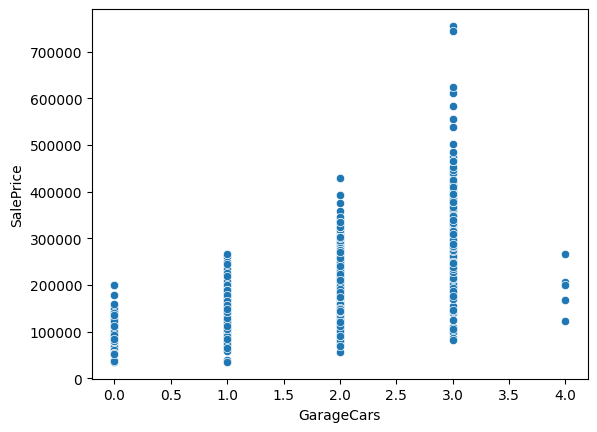

In [51]:
sns.scatterplot(x='GarageCars', y='SalePrice', data=df)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

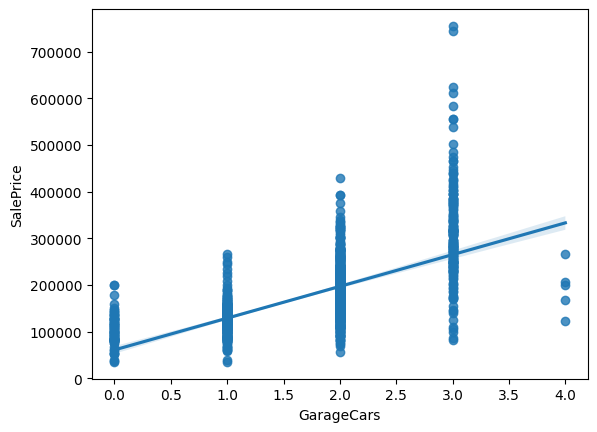

In [52]:
sns.regplot(x='GarageCars', y='SalePrice', data=df)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

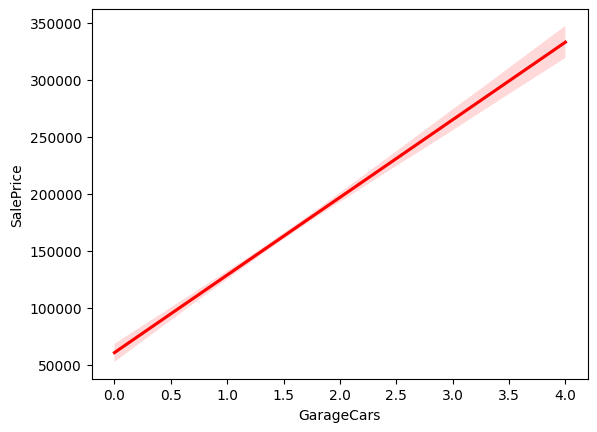

In [60]:
sns.regplot(x='GarageCars', y='SalePrice', data=df, scatter=False)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

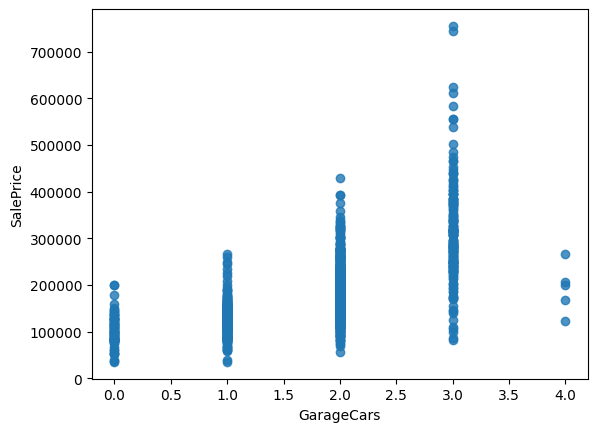

In [55]:
sns.regplot(x='GarageCars', y='SalePrice', data=df, fit_reg=False)

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

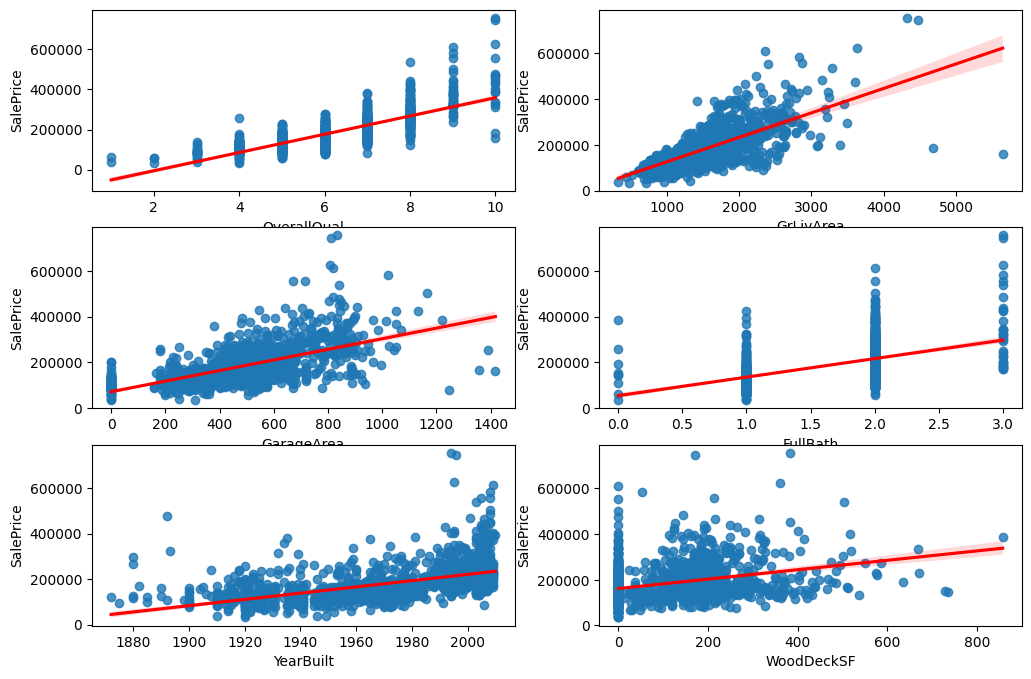

In [61]:
fig, ((ax1,ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

sns.regplot(x='OverallQual', y='SalePrice', data=df, ax=ax1, line_kws={'color':'red'})
sns.regplot(x='GrLivArea', y='SalePrice', data=df, ax=ax2, line_kws={'color':'red'})
sns.regplot(x='GarageArea', y='SalePrice', data=df, ax=ax3, line_kws={'color':'red'})
sns.regplot(x='FullBath', y='SalePrice', data=df, ax=ax4, line_kws={'color':'red'})
sns.regplot(x='YearBuilt', y='SalePrice', data=df, ax=ax5, line_kws={'color':'red'})
sns.regplot(x='WoodDeckSF', y='SalePrice', data=df, ax=ax6, line_kws={'color':'red'})

### Boxplot

<Axes: xlabel='SalePrice'>

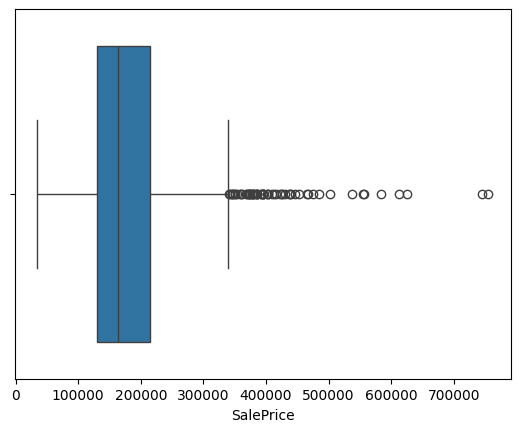

In [5]:
sns.boxplot(x=df['SalePrice'])

<Axes: xlabel='SaleType', ylabel='SalePrice'>

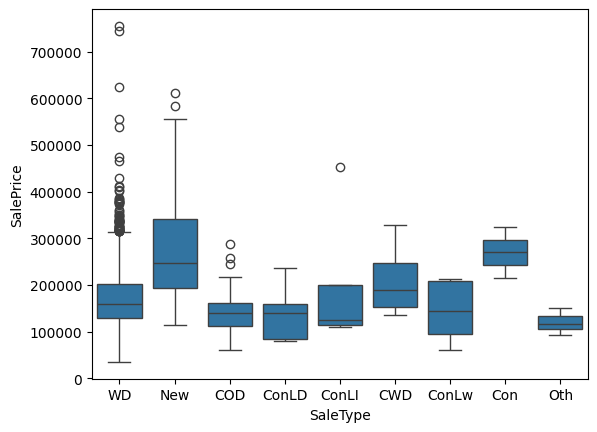

In [7]:
sns.boxplot(x=df['SaleType'], y=df['SalePrice'])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

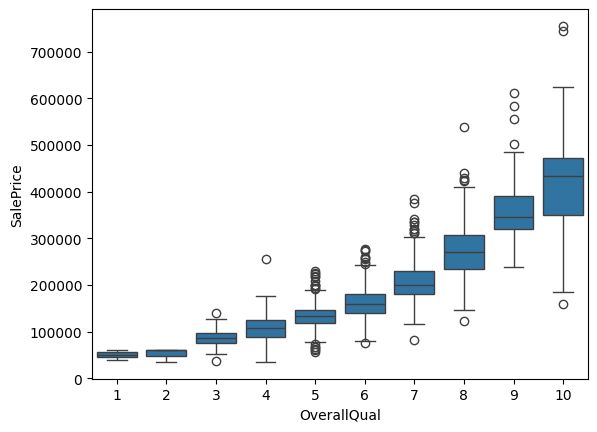

In [8]:
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])

### Detect Outlier

In [9]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
first_quartile = df['SalePrice'].quantile(0.25)
first_quartile

129975.0

In [13]:
third_quartile = df['SalePrice'].quantile(0.75)
third_quartile

214000.0

In [14]:
IQR = third_quartile - first_quartile

In [15]:
right_threshold = third_quartile + 3*IQR

In [17]:
df[df['SalePrice'] > right_threshold]['SalePrice']

178     501837
185     475000
440     555000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1169    625000
1182    745000
1373    466500
Name: SalePrice, dtype: int64